In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import tensorflow_decision_forests as tfdf

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train.head()

2024-02-26 13:32:45.198741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 13:32:45.198957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 13:32:45.358772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


50.36% od the passengers have been transported


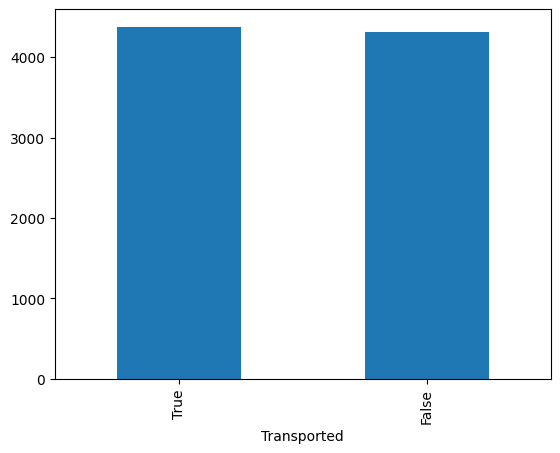

In [2]:
train.Transported.value_counts().plot(kind='bar')
percentage = train['Transported'].sum()/train['Transported'].count()*100.0
print(f"{percentage:.2f}% od the passengers have been transported")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

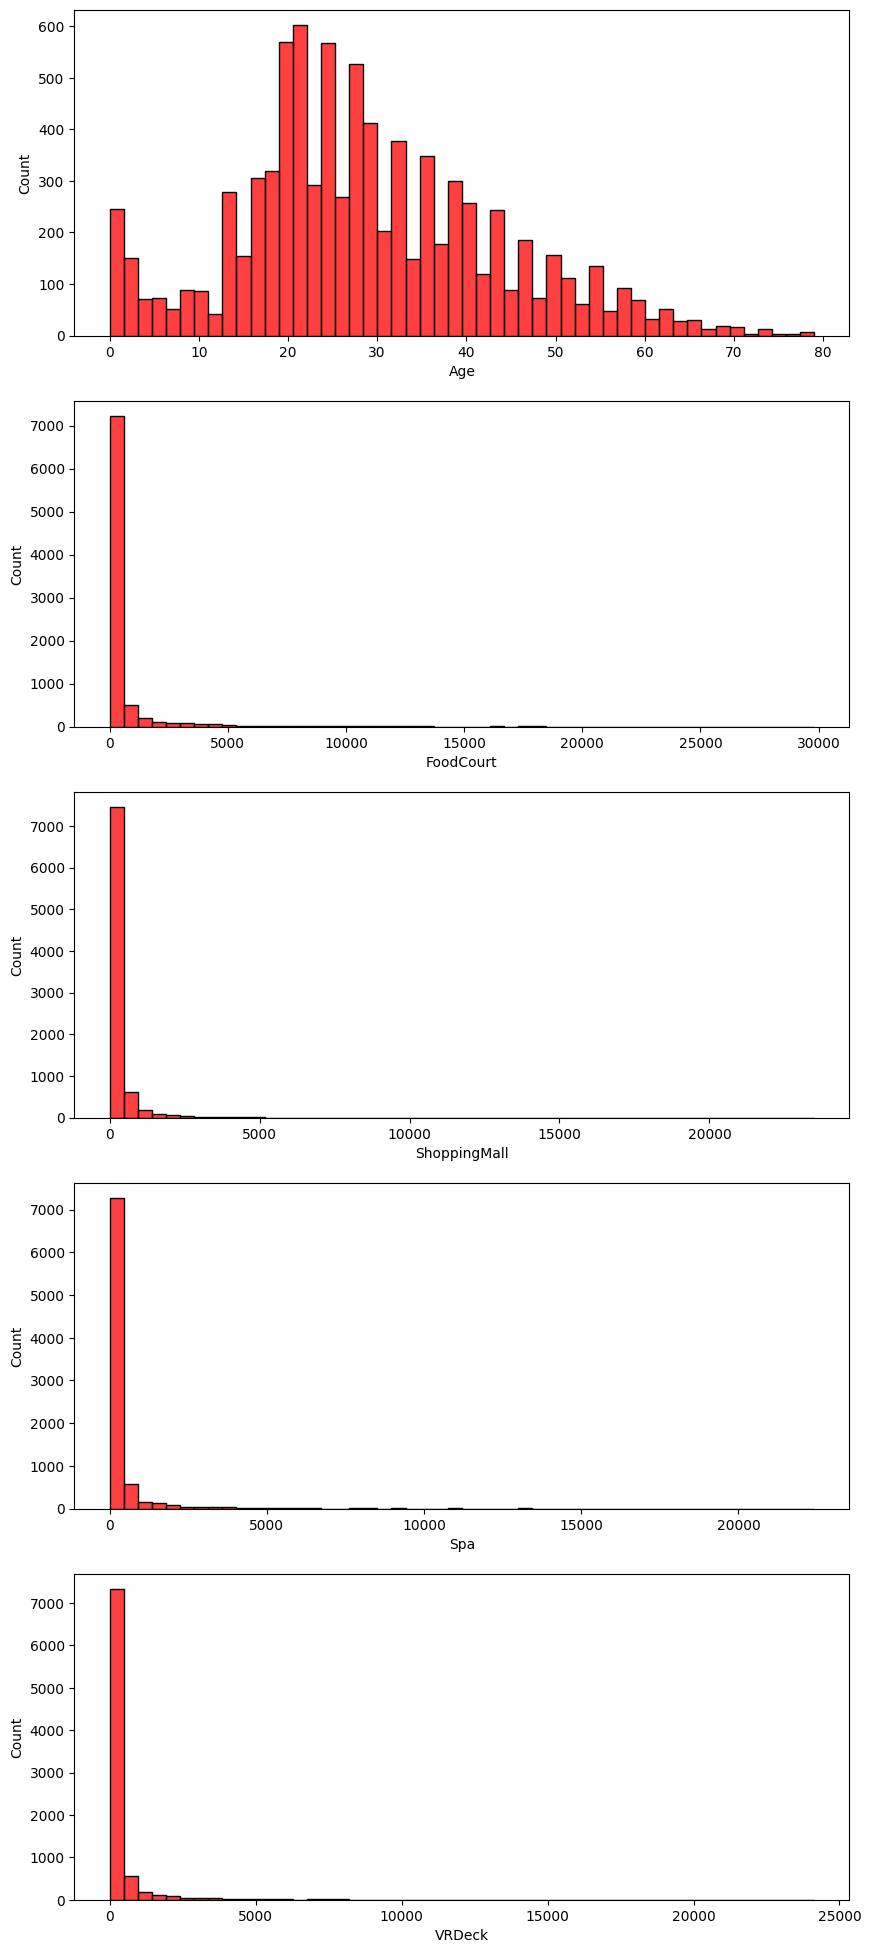

In [3]:
fig, ax = plot.subplots(5,1,  figsize=(10, 10))
plot.subplots_adjust(top = 2)

sns.histplot(train['Age'], color='r', bins=50, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='r', bins=50, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='r', bins=50, ax=ax[2]);
sns.histplot(train['Spa'], color='r', bins=50, ax=ax[3]);
sns.histplot(train['VRDeck'], color='r', bins=50, ax=ax[4]);

In [4]:
train = train.drop(['PassengerId', 'Name'], axis=1)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
missing_val_count_columns = train.isnull().sum()
print('Columns with missing values before filling:')
print(missing_val_count_columns.sort_values(ascending=False))
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
print('Columns with missing values after filling:')
train.isnull().sum().sort_values(ascending=False)

Columns with missing values before filling:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64
Columns with missing values after filling:


HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [6]:
train['Transported'] = train['Transported'].astype(int)
train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [7]:
train[["Deck", "Cabin_num", "Side"]] = train["Cabin"].str.split("/", expand=True)
try:
    train = train.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [8]:
def split(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_set, valid_set = split(train)
print("{} - training set, {} - validation set.".format(len(train_set), len(valid_set)))

6930 - training set, 1763 - validation set.


In [9]:
train_set = tfdf.keras.pd_dataframe_to_tf_dataset(train_set, label="Transported")
valid_set = tfdf.keras.pd_dataframe_to_tf_dataset(valid_set, label="Transported")

model = tfdf.keras.RandomForestModel()
model.compile(metrics=['accuracy'])

model.fit(train_set)

Use /tmp/tmpt54w3ojj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.735824. Found 6930 examples.
Training model...


[INFO 24-02-26 13:33:53.1735 UTC kernel.cc:1233] Loading model from path /tmp/tmpt54w3ojj/model/ with prefix 213184841e7a4e35


Model trained in 0:00:48.550070
Compiling model...


[INFO 24-02-26 13:33:54.2118 UTC decision_forest.cc:660] Model loaded with 300 root(s), 234410 node(s), and 13 input feature(s).
[INFO 24-02-26 13:33:54.2119 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-02-26 13:33:54.2119 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [10]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [11]:
evaluation = model.evaluate(x=valid_set,return_dict=True)
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 70ms/step - loss: 0.0000e+00 - accuracy: 0.7981
loss: 0.0000
accuracy: 0.7981


In [12]:
inspector = model.make_inspector()
inspector.evaluation()
print("Variable importances:")
for importance_type, importance_values in inspector.variable_importances().items():
    print(f"\tImportance Type: {importance_type}")
    for feature_importance_tuple in importance_values:
        feature_name = feature_importance_tuple[0]
        importance_score = feature_importance_tuple[1]
        print(f"\t\tFeature: {feature_name}, Importance: {importance_score}")

Variable importances:
	Importance Type: SUM_SCORE
		Feature: "Cabin_num" (4; #1), Importance: 251772.59084254317
		Feature: "CryoSleep" (1; #2), Importance: 140102.23876046547
		Feature: "RoomService" (1; #7), Importance: 112035.03982209676
		Feature: "Spa" (1; #10), Importance: 106954.05784033699
		Feature: "VRDeck" (1; #12), Importance: 97401.6612267025
		Feature: "Deck" (4; #3), Importance: 85432.37288433796
		Feature: "Age" (1; #0), Importance: 79896.4721356654
		Feature: "FoodCourt" (1; #5), Importance: 75806.42933612282
		Feature: "ShoppingMall" (1; #8), Importance: 52149.79562907404
		Feature: "HomePlanet" (4; #6), Importance: 50503.11601690191
		Feature: "Side" (4; #9), Importance: 20198.393565574574
		Feature: "Destination" (4; #4), Importance: 17545.390571201977
		Feature: "VIP" (1; #11), Importance: 306.17461901251227
	Importance Type: NUM_AS_ROOT
		Feature: "CryoSleep" (1; #2), Importance: 113.0
		Feature: "RoomService" (1; #7), Importance: 78.0
		Feature: "Spa" (1; #10), I

In [13]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = test.PassengerId

In [14]:
test[['VIP', 'CryoSleep']] = test[['VIP', 'CryoSleep']].fillna(value=0)

test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)
test = test.drop('Cabin', axis=1)

test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

test = tfdf.keras.pd_dataframe_to_tf_dataset(test)

In [15]:
predictions = model.predict(test)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 68ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [16]:
sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission['Transported'] = n_predictions
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
